## Final Project Submission

Please fill out:
* Student name: Sylvia Sarange Manono
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Samuel G. Mwangi
* Blog post URL:

# Microsoft Movie Venture

Author: Sylvia Sarange Manono

## Overview

The goal of this project is to perform exploratory data analysis on movie data to provide insights that can help guide Microsoft's new movie studio on what types of films to produce.

## Business Problem

With more and more movie studios opting to distribute their content on their own platforms, successful entertainment companies today are increasingly dependent on original content. Additionally, major tech companies like Netflix, Amazon, and Apple have been investing heavily in creating original video content. For instance, at its inception, Netflix, one of the pioneer movie streaming sites rose to popularity by distributing content licensed from established movie studios. However, with the growing demand for streaming services, these studios established their own streaming platforms, forcing Netflix to invest heavily in its own content.  

Microsoft, a world renowned tech company, has decided to follow suit by establishing a new movie studio division to compete with other entertainment industry stakeholders. However, Microsoft has little prior experience in the movie production business. To assist in defining the strategic direction for the new studio, data-driven insights are needed on current box office trends and successful movie genres, styles, and so on. This project seeks to provide actionable insights from explortatory data analysis to inform Microsoft's decision and ensure the venture is successful and profitable.

## **Data Understanding**

### **Data Sources**

Movie datasets are obtained from the following two sources:

1. im.db
2. tn.movie_budgets.csv
3. rt.movie_info.tsv
4. tmdb.movies.csv

### **Library Importation**

In [111]:
# Importing the necessary libraries and modules
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [112]:
import os
import sqlite3
import pandas as pd

In [113]:
# Creating a path

imdb_path = os.path.join('im.db')

In [114]:
# Opening a connection and initializing a cursor

conn = sqlite3.connect('im.db')
cursor = conn.cursor()

The database has various tables, but the ones that are of interest in this case are 'movie_basics' and 'movie_ratings'.

In [115]:
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,Table Names


#### *Reading the budget csv file*

In [116]:
# Reading the bom.movies csv file and displaying the first two entries
bomovies_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bomovies_df.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [117]:
# Reding the movie budgets csv file and displaying the first two entries
movie_budgets_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_budgets_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [118]:
movie_budgets_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

## **Data Preparation**

**a.  Combining the relevant tables in im.db**

I combined the 'movie_basics' and 'movie_ratings' tables by executing thr following SQL command in DB Browser for SQLite. By doing so, I ensured that the data contained in the merged table was complete with no null values.

SELECT *
FROM movie_basics INNER JOIN movie_ratings
ON movie_basics.movie_id = movie_ratings.movie_id

**b. Checking for null values in tn.movie_budgets.csv**

In [119]:
movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no null values in this file

**c. Checking the column data types in tn.movie_budgets.csv**

In [120]:
movie_budgets_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

It seems the data in all columns are strings. Since we would like the production, domestic and worldwide gross amounts to be integers, we convert the (str) to (int) as follows:

In [121]:
movie_budgets_df["production_budget"] = movie_budgets_df["production_budget"].replace("[$,]", "", regex=True).astype(float)
movie_budgets_df["worldwide_gross"] = movie_budgets_df["worldwide_gross"].replace("[$,]", "", regex=True).astype(float)
movie_budgets_df["domestic_gross"] = movie_budgets_df["domestic_gross"].replace("[$,]", "", regex=True).astype(float)
movie_budgets_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08


Additionally, we would like to compare movie release years to track annual trends. This information could be useful in assessing the cyclical (if any) trends in preferred genres.

In [122]:
movie_budgets_df['release_date'] = movie_budgets_df['release_date'].str[-4:]
movie_budgets_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
5,6,2015,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
7,8,2007,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08
8,9,2017,Justice League,300000000.0,229024295.0,6.559452e+08
9,10,2015,Spectre,300000000.0,200074175.0,8.796209e+08


## Data Analysis

## High-grossing Movie Budgets

At this stage, I'm working with the hypothesis that production budgets are proportional to wordwide gross income. I will prove or disprove this hypothesis using a scatter plot to establish corelation.

In [123]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


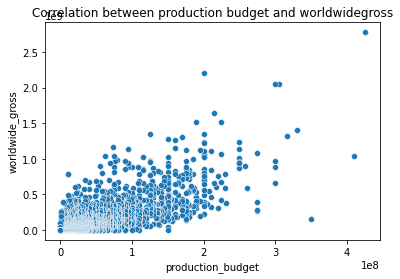

In [124]:
sns.scatterplot(x='production_budget', y='worldwide_gross', data=movie_budgets_df).set(title='Correlation between production budget and worldwidegross')

plt.show()

In [125]:
df6=movie_budgets_df.nlargest (n=20, columns='worldwide_gross')
df6 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09
42,43,1997,Titanic,200000000.0,659363944.0,2.208208e+09
5,6,2015,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
33,34,2015,Jurassic World,215000000.0,652270625.0,1.648855e+09
66,67,2015,Furious 7,190000000.0,353007020.0,1.518723e+09
26,27,2012,The Avengers,225000000.0,623279547.0,1.517936e+09
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
41,42,2018,Black Panther,200000000.0,700059566.0,1.348258e+09
260,61,2011,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09


I isolated the top 10 movies as follows.

In [126]:
df7=movie_budgets_df.nlargest (n=10, columns='production_budget')
df7 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
5,6,2015,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
7,8,2007,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08
8,9,2017,Justice League,300000000.0,229024295.0,6.559452e+08
9,10,2015,Spectre,300000000.0,200074175.0,8.796209e+08


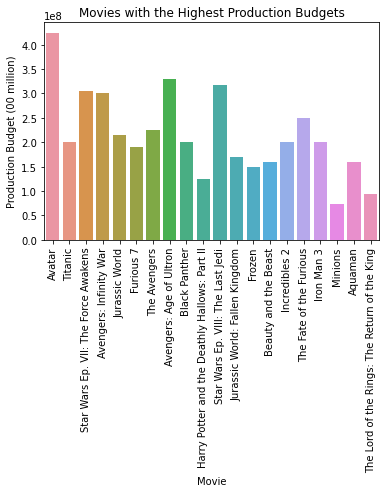

In [127]:
sns.barplot(x='movie', y='production_budget', data=df6)
plt.xticks(rotation=90)
plt.title('Movies with the Highest Production Budgets')
plt.xlabel('Movie')
plt.ylabel('Production Budget (00 million)')
plt.show()

## Popular Genres

In [129]:
rt_df = pd.read_csv(("zippedData/rt.movie_info.tsv.gz"),delimiter = "\t") 
rt_df.head(10) 

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [130]:
rt_df.genre.value_counts().nlargest(10) 

Drama                                              151
Comedy                                             110
Comedy|Drama                                        80
Drama|Mystery and Suspense                          67
Art House and International|Drama                   62
Action and Adventure|Drama                          42
Action and Adventure|Drama|Mystery and Suspense     40
Drama|Romance                                       35
Comedy|Romance                                      32
Art House and International|Comedy|Drama            31
Name: genre, dtype: int64

In [131]:
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


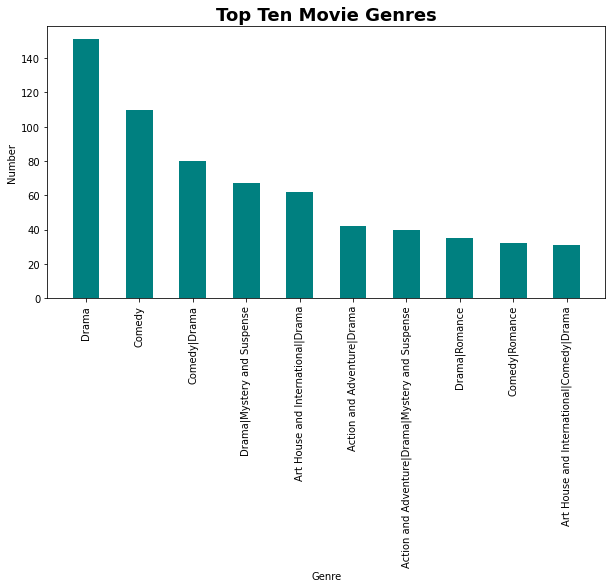

In [132]:
x = rt_df["genre"].value_counts().head(10).index.tolist()
y = list(rt_df["genre"].value_counts().nlargest(10))   

fig,ax = plt.subplots(figsize = (10,5))
plt.bar(x, y, color = "Teal", width = 0.5)
plt.xlabel('Genre')
plt.ylabel('Number')
plt.xticks(rotation = 90);
plt.title("Top Ten Movie Genres", fontsize = 18, fontweight = "bold");

## Popular Languages

In [141]:
tmbd_df = pd.read_csv("zippedData/tmdb.movies.csv.gz") 

tmbd_df.head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [142]:
grouped = tmbd_df.groupby(["original_language"]).sum().sort_values(by="popularity", ascending= False) 
grouped.head()

,Unnamed: 0,id,popularity,vote_average,vote_count
original_language,,,,,
en,312028215,7005029780,71895.155,138662.0,4874990
fr,5744495,118048030,2155.574,3130.8,75337
ja,3769256,70813222,1513.434,1809.1,54774
es,6070196,127264882,1257.725,2874.3,29396
ru,2859417,64494601,708.220,1579.4,4901


In [145]:
language =  ["en","fr","ja","es", "ru"]
Popularity= [71896,2155,1513,1257,708]
grouped["popularity"].head()

original_language
en    71895.155
fr     2155.574
ja     1513.434
es     1257.725
ru      708.220
Name: popularity, dtype: float64

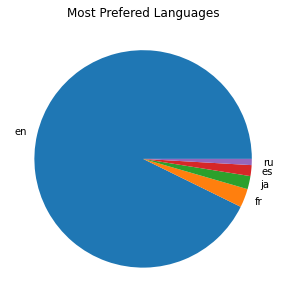

In [147]:
fig,ax = plt.subplots(figsize = (5,5))
plt.pie(Popularity, labels = language)
plt.title("Most Prefered Languages");

## **Recommendations** 

### **1. Budgetary Allocation**

Using the worldwide gross income data along with available production budget information, I identified a positive corelation between both. As a result, it is possible to determine a ratio of the production budget and the expected income. By doing so, Microsoft will make data-driven investment decisions after considering realistic possible impacts on the company's bottom line. Besides that, this analysis can be expanded to provide nuance between movie performance in domestic and international markets.

**Recommedation:** Production budget approvals should be based on histroric data with gross income consideed. Additionally, nuanced decisions should be made based on the target market, i.e. domestic or international audiences.

### **2. Genre Preferences**

The findings show that viewers prefer diverse genres, but Drama emerged as the leading one. Except for comedy, which came second among the most preferred, drama featured in the next 3 of the top 5 slots. This result was due to the viewers selecting a combination of genres due to the multi-faceted nature of most movies in today's entertainment landscape. The top 5 slots were occupied by:
    a. Drama
    b. Comedy
    c. Comedy, and drama
    d. Drama, and Mystery and Suspense
    e. Art House and International, and Drama

**Recommendation:** MIcrosoft would benefit highly from investing in the popular genres, especially Drama and Comedy.

## **3. Language Preferences**

Based on the target audience, the language spoken in a movie is instrumental in determining its success. For instance, despite being the third-most spoken language globally, the findings revealed English as the most popular language among 96.7% of respondents. Consequently, this is the recommended language for a company looking to enter the movie-making sector. However, an argument can be made in favor of the other top languages, including French (1.5%), Japanese (1.1%), Spanish (0.6%), and Russian (0.1%). With English being so prominent among already-released content so far, there is room to increase the market share of the other languages.

**Recommendation:** Microsoft should prioritize investment in English language original content. However, the company should also make conservative invest,ent in French and Japanese language content in an attempt to make inroards in those unsaturated markets.